In [ ]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('sobhanmoosavi/us-accidents',path='.',unzip=True)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)# Hiển thị tất cả các cột

In [ ]:
df = pd.read_csv("US_Accidents_March23.csv")# Đọc dữ liệu từ file CSV

In [10]:
df.head()# Hiển thị 5 dòng đầu tiên của DataFrame

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


1. Kiểm tra kích thước & cấu trúc dữ liệu

In [16]:
print("Kích thước của dữ liệu (rows, columns):", df.shape)
print("\nThông tin cấu trúc dữ liệu:")
print(df.info())

Kích thước của dữ liệu (rows, columns): (7728394, 46)

Thông tin cấu trúc dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Tempera

2. Kiểm tra dữ liệu bị thiếu (missing values)

In [17]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("\nCác cột có giá trị thiếu:")
print(missing_df)


Các cột có giá trị thiếu:
                       Missing Values  Percentage
End_Lat                       3402762   44.029355
End_Lng                       3402762   44.029355
Precipitation(in)             2203586   28.512858
Wind_Chill(F)                 1999019   25.865904
Wind_Speed(mph)                571233    7.391355
Visibility(mi)                 177098    2.291524
Wind_Direction                 175206    2.267043
Humidity(%)                    174144    2.253301
Weather_Condition              173459    2.244438
Temperature(F)                 163853    2.120143
Pressure(in)                   140679    1.820288
Weather_Timestamp              120228    1.555666
Sunrise_Sunset                  23246    0.300787
Civil_Twilight                  23246    0.300787
Nautical_Twilight               23246    0.300787
Astronomical_Twilight           23246    0.300787
Airport_Code                    22635    0.292881
Street                          10869    0.140637
Timezone               

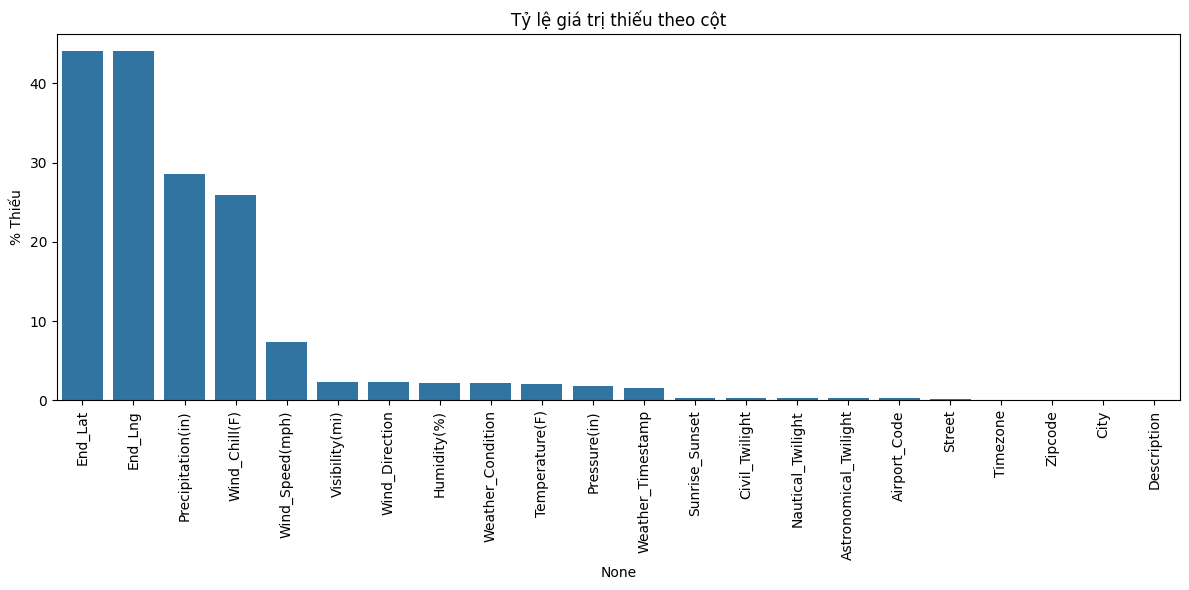

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_df.index, y=missing_df['Percentage'])
plt.xticks(rotation=90)
plt.title("Tỷ lệ giá trị thiếu theo cột")
plt.ylabel("% Thiếu")
plt.tight_layout()
plt.show()

3. Kiểm tra dữ liệu trùng lặp

In [23]:
duplicate_count = df.duplicated().sum()
print(f"\nSố dòng trùng lặp: {duplicate_count}")


Số dòng trùng lặp: 0


4. Kiểm tra các giá trị duy nhất (unique)

In [24]:
print("\nSố giá trị duy nhất trong từng cột:")
unique_vals = df.nunique().sort_values(ascending=True)
print(unique_vals)


Số giá trị duy nhất trong từng cột:
Country                        1
Turning_Loop                   1
Amenity                        2
Bump                           2
Civil_Twilight                 2
Sunrise_Sunset                 2
Traffic_Signal                 2
Crossing                       2
Railway                        2
Stop                           2
Station                        2
Roundabout                     2
Junction                       2
No_Exit                        2
Give_Way                       2
Traffic_Calming                2
Astronomical_Twilight          2
Nautical_Twilight              2
Source                         3
Severity                       4
Timezone                       4
Wind_Direction                24
State                         49
Visibility(mi)                92
Humidity(%)                  100
Weather_Condition            144
Wind_Speed(mph)              184
Precipitation(in)            299
Temperature(F)               860
Wind_C

5. Kiểm tra dữ liệu ngoại lệ (outliers)

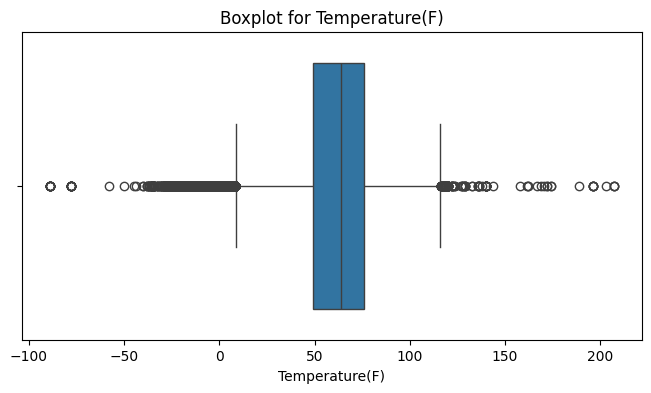

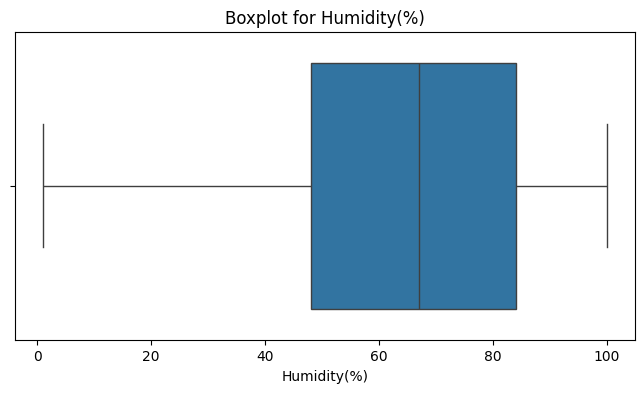

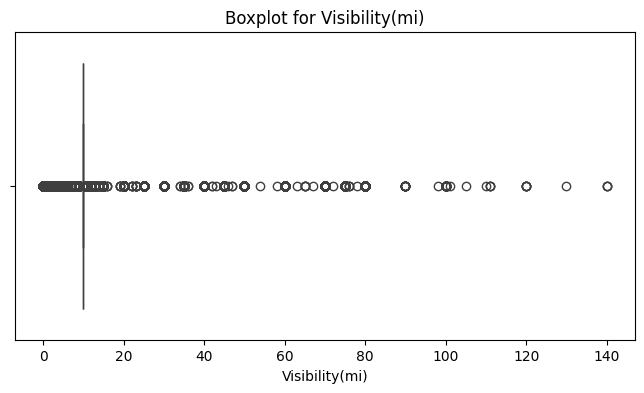

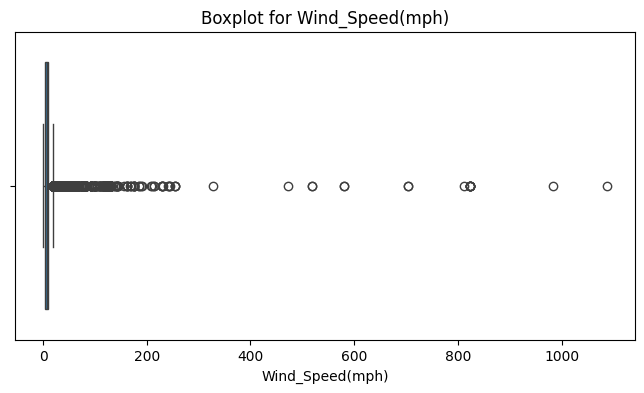

In [32]:
numeric_cols = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

6. Kiểm tra tính hợp lệ theo quy tắc

In [28]:
print("\nGiá trị duy nhất của cột 'Severity':", df['Severity'].unique())
print("Kiểm tra giá trị không hợp lệ (Severity ngoài khoảng 1-4):")
print(df[~df['Severity'].isin([1, 2, 3, 4])])


Giá trị duy nhất của cột 'Severity': [3 2 1 4]
Kiểm tra giá trị không hợp lệ (Severity ngoài khoảng 1-4):
Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []


7. Kiểm tra định dạng dữ liệu ngày tháng

In [29]:
# Kiểm tra kiểu dữ liệu trước
print("\nKiểu dữ liệu cột Start_Time:", df['Start_Time'].dtype)

# Chuyển đổi nếu chưa phải datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Kiểm tra các giá trị không chuyển đổi được
invalid_dates = df['Start_Time'].isnull().sum()
print(f"Số giá trị ngày tháng không hợp lệ: {invalid_dates}")


Kiểu dữ liệu cột Start_Time: object
Số giá trị ngày tháng không hợp lệ: 743166


8. Kiểm tra giá trị ngoài tập cho phép

In [30]:
valid_directions = ['N', 'S', 'E', 'W', 'NE', 'NW', 'SE', 'SW', 'Calm', 'Variable', 'North', 'South', 'East', 'West']
invalid_wind = df[~df['Wind_Direction'].isin(valid_directions)]
print(f"\nSố dòng có 'Wind_Direction' không hợp lệ: {len(invalid_wind)}")
print("Các giá trị không hợp lệ:")
print(invalid_wind['Wind_Direction'].value_counts())


Số dòng có 'Wind_Direction' không hợp lệ: 3969456
Các giá trị không hợp lệ:
Wind_Direction
CALM    961624
SSW     384840
WNW     378781
WSW     353806
SSE     349110
NNW     333427
ESE     268311
ENE     258474
NNE     255311
VAR     250566
Name: count, dtype: int64
